# Googledrive,220919をベースに分析

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import pearsonr
from sklearn.model_selection import GroupKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow.keras import mixed_precision
from tensorflow.keras import backend as K
from tqdm.notebook import tqdm
import random
import warnings
import gc
import time
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model

from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from IPython.core.display import Image

from sklearn.preprocessing import StandardScaler


In [ ]:
class CFG:
    make_folder = False
    note_num = "StackingOpt/EDA002"
    seed = 42


OUTPUT_DIR = f'H:/study/output/{CFG.note_num}/'

if CFG.make_folder:
    if not os.path.exists(OUTPUT_DIR):
        os.makedirs(OUTPUT_DIR)


In [4]:
df = pd.read_csv("H:\study\preprocessing_data/all_data_ver3.csv")

In [20]:
df[[f'env_{id}' for i in unique_id] ]

,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470
0,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658,0.658
1,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730,0.730
2,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802,0.802
3,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.799,0.79

In [7]:
df[[f'twoweeks_max_{id}' for i in unique_id] ]


,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470,twoweeks_max_6910000470
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
import re
preal = [s for s in df.columns if 'preal' in s]
preal = [s for s in preal if "meshint" not in s ]
unique_id = []
for i in range(len(preal)):
  numbers = re.sub(r'[^0-9]', '', preal[i])
  unique_id.append(numbers)

import datetime
df["time"] = df["hour"]//1
df["minute"] = df["hour"]%1*60
df[["time","minute"]] = df[["time","minute"]].astype(int)
df[["year","month","day","time","minute"]] = df[["year","month","day","time","minute"]].astype(str)
df["datetime"] = df["year"] +"-" + df["month"] +"-" + df["day"] +"-" + df["time"] +"-" + df["minute"]
df["datetime"] = pd.to_datetime(df["datetime"],format='%Y-%m-%d-%H-%M')


##optical flow 予測値を2週間最大値を使って変換

target = [s for s in df.columns if ("preal" in s) and ("meshint" not in s) and ("preal-" not in s)]
env = [s for s in df.columns if ("env" in s)]

import re
unique_id = []
for i in range(len(target)):
  numbers = re.sub(r'[^0-9]', '', target[i])
  unique_id.append(numbers)

for id in unique_id:
  df[f'env_{id}'] = df[f'env_{id}']*df[f'twoweeks_max_{id}']


オプティカルフロー予測値の欠損が多いidを除く

drop_id;4


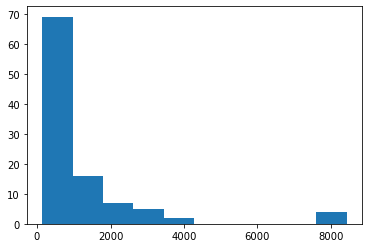

In [5]:
env_counts = 4000

t = [s for s in df.columns if "env" in s]
missing_env = pd.DataFrame(df[t].isnull().sum().sort_values(ascending=False))
missing_env.columns = ["counts"]

plt.hist(missing_env.counts)
print(f"drop_id;{missing_env[missing_env.counts>=env_counts].shape[0]}")

env_drop_id = missing_env[missing_env.counts>=env_counts].index
env_drop_id = [s[4:] for s in env_drop_id]

オプティカルフロー予測の欠損値が多い日を除く

In [8]:
count = 30 #欠損しているidの数

s = pd.read_csv("H:\study\preprocessing_data/all_data.csv")
#s = s[~s.id.isin(drop_id_int)]

missing_date = pd.DataFrame(s[s.env.isnull()].datetime.value_counts())
fig = plt.figure()
plt.hist(s[s.env.isnull()].datetime.value_counts())
plt.show()
print(missing_date[missing_date.datetime>=count].shape[0]/missing_date.shape[0])

drop_datetime = missing_date[missing_date.datetime>=count].index

AttributeError: 'DataFrame' object has no attribute 'datetime'

In [ ]:
missing_date

,datetime
2014-03-10 06:30:00,103
2013-11-23 06:30:00,103
2013-11-22 06:30:00,103
2013-12-28 07:00:00,103
2013-11-21 18:00:00,103
...,...
2014-04-24 15:00:00,4
2014-04-24 15:30:00,4
2014-04-24 16:00:00,4
2014-04-25 06:30:00,4


In [11]:
df[[f'env_{id}' for i in unique_id] ]

,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470,env_6910000470
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [13]:
df[[f'env_{id}' for i in unique_id] ].isnull().sum()

env_6910000470    8424
env_6910000470    8424
env_6910000470    8424
env_6910000470    8424
env_6910000470    8424
                  ... 
env_6910000470    8424
env_6910000470    8424
env_6910000470    8424
env_6910000470    8424
env_6910000470    8424
Length: 103, dtype: int64

発電量のデータ数割合がrate以上のidを除く

In [ ]:
rate = 1.0

target = [s for s in df.columns if ("preal" in s) and ("meshint" not in s) and ("preal-" not in s)]
base_cols = ["year","month","day","time","minute"]

df[base_cols] = df[base_cols].astype(int)
X = df.loc[(df.month!=6)&(df.month!=6),target]

missing = pd.DataFrame(X.isnull().sum()/X.shape[0],columns=["missing_rate"])
missing.sort_values(ascending=False,by="missing_rate",inplace=True)


#use_cols = list(missing[missing.missing_rate<rate].index) 
drop_cols = list(missing[missing.missing_rate>=rate].index)
drop_id = []
for i in drop_cols:
  numbers = re.sub(r'[^0-9]', '',i)
  drop_id.append(numbers)
drop_id_int = [int(s) for s in drop_id]

上の処理結果を反映させる

In [ ]:
df = df[~df.datetime.isin(drop_datetime)]
drop_ids = list(set(env_drop_id + drop_id))
use_ids = [s for s in unique_id if s not in drop_ids]


use_ppred_real = [f"ppred_{i}" for i in use_ids] + [f"preal_{i}" for i in use_ids]

In [ ]:
from sklearn.impute import KNNImputer

n = 10


features = base_cols + use_ppred_real 
X_ = df.loc[(df.month!=6)&(df.month!=7),features]

df_imp = df.copy()
imputer = KNNImputer(
    n_neighbors=n, # the number of neighbours K
    weights='distance', # the weighting factor
    metric='nan_euclidean', # the metric to find the neighbours
    add_indicator=False, # whether to add a missing indicator
)

imputer.fit(X_)

df_imp.loc[(df_imp.month!=7)&(df_imp.month!=6),features] = imputer.transform(df_imp.loc[(df_imp.month!=7)&(df_imp.month!=6),features])
df_imp.loc[df_imp.month==6,features] = imputer.transform(df_imp.loc[df_imp.month==6,features])
df_imp.loc[df_imp.month==7,features] = imputer.transform(df_imp.loc[df_imp.month==7,features])



## オプティカルフローの予測値を使わない補間
features = base_cols + [f"preal_{i}" for i in use_ids]
X_ = df.loc[(df.month!=6)&(df.month!=7),features]

df_imp2 = df.copy()
imputer = KNNImputer(
    n_neighbors=n, # the number of neighbours K
    weights='distance', # the weighting factor
    metric='nan_euclidean', # the metric to find the neighbours
    add_indicator=False, # whether to add a missing indicator
)

imputer.fit(X_)

df_imp2.loc[(df_imp2.month!=7)&(df_imp2.month!=6),features] = imputer.transform(df_imp2.loc[(df_imp2.month!=7)&(df_imp2.month!=6),features])
df_imp2.loc[df_imp2.month==6,features] = imputer.transform(df_imp2.loc[df_imp2.month==6,features])
df_imp2.loc[df_imp2.month==7,features] = imputer.transform(df_imp2.loc[df_imp2.month==7,features])



In [ ]:
## オプティカルフローの予測値を使わない補間
features = base_cols + [f"preal_{i}" for i in use_ids]
X_ = df_imp2.loc[(df_imp2.month!=6)&(df_imp2.month!=7),features]

df_imp3 = df_imp2.copy()
imputer = KNNImputer(
    n_neighbors=n, # the number of neighbours K
    weights='distance', # the weighting factor
    metric='nan_euclidean', # the metric to find the neighbours
    add_indicator=False, # whether to add a missing indicator
)

imputer.fit(X_)

df_imp3.loc[(df_imp3.month!=7)&(df_imp3.month!=6),features] = imputer.transform(df_imp3.loc[(df_imp3.month!=7)&(df_imp3.month!=6),features])
df_imp3.loc[df_imp3.month==6,features] = imputer.transform(df_imp3.loc[df_imp3.month==6,features])
df_imp3.loc[df_imp3.month==7,features] = imputer.transform(df_imp3.loc[df_imp3.month==7,features])

In [ ]:
drop_cols = []
for id in drop_ids:
  s = [s for s in df_imp.columns if id in s]
  drop_cols += s
use_cols = [s for s in df_imp.columns if s not in drop_cols]

df_imp = df_imp[use_cols]
df_imp2 = df_imp2[use_cols]
df_imp3 = df_imp3[use_cols]

df = df[use_cols]

In [ ]:
from datetime import date,timedelta

def lag_features(df,time):
  preal = [s for s in df.columns if ('preal' in s) and ("meshint" not in s) and ("preal-" not in s)]
  df[f"datetime-{time}"] = df["datetime"] - timedelta(minutes=time)
  for real in preal:
    real_map = dict(zip(df["datetime"],df[real]))
    df[real[:5]+f"-{time}"+real[5:]] = df[f"datetime-{time}"].map(real_map)
  return df

In [ ]:
df_imp = lag_features(df_imp,30)
df = lag_features(df,30)
#df = lag_features(df,30)
#df = lag_features(df,60)
#df = lag_features(df,90)

In [ ]:
df_imp2 = lag_features(df_imp2,30)
df_imp3 = lag_features(df_imp3,30)

## データセット

In [ ]:
target = [s for s in df.columns if ("preal" in s) and ("meshint" not in s) and ("preal-" not in s)]



import re
preal = [s for s in df.columns if ('preal' in s) and ("meshint" not in s) and ("preal-" not in s)]
unique_id = []
for id in target:
  numbers = re.sub(r'[^0-9]', '', id)
  unique_id.append(numbers)

#df.dropna(subset=p50,inplace=True)
#df.dropna(subset=p50,inplace=True)

In [ ]:
df_ = pd.DataFrame()

base_col_ = [s for s in list(df.columns) if unique_id[0] in s]

base_col = []
for s in base_col_:
  target = unique_id[0]  
  idx = s.find(target)
  r = s[:idx-1]
  base_col.append(r)

for i in range(len(unique_id)):
  data = pd.DataFrame()
  data[["datetime","year","month","day","time","minute"]] = df[["datetime","year","month","day","time","minute"]].copy()
  col = [s +'_'+ unique_id[i] for s in base_col]
  data[base_col] = df[col]
  ppred_col = [f"ppred_{id}" for id in unique_id]
  data[ppred_col] = df[ppred_col]
  df_ = pd.concat([df_,data],axis=0)

col = [s for s in df.columns if "preal-" in s] + [s for s in df.columns if "ppred_" in s]
df_[col] = df[col]
df_[['year', 'month', 'day', 'time', 'minute', 'id']] = df_[['year', 'month', 'day', 'time', 'minute', 'id']].astype(int)
df_["nv2"] = df_["preal"]/df_["observed_max"]


## オプティカルフロー有り　データセット

In [ ]:
for_train_test = df_.reset_index(drop=True).dropna(subset=["nv2"])
train_test = pd.DataFrame()

base_col_ = [s for s in list(df_imp.columns) if unique_id[0] in s]

base_col = []
for s in base_col_:
  target = unique_id[0]  
  idx = s.find(target)
  r = s[:idx-1]
  base_col.append(r)

for i in range(len(unique_id)):
  data = pd.DataFrame()
  data[["datetime","year","month","day","time","minute"]] = df_imp[["datetime","year","month","day","time","minute"]].copy()
  col = [s +'_'+ unique_id[i] for s in base_col]
  data[base_col] = df_imp[col]
  env_col = [f"env_{id}" for id in unique_id]
  data[ppred_col] = df_imp[ppred_col]
  train_test = pd.concat([train_test,data],axis=0)

col = [s for s in df_imp.columns if "preal-" in s] + [s for s in df_imp.columns if "ppred_" in s]
train_test[col] = df_imp[col]
train_test[['year', 'month', 'day', 'time', 'minute', 'id']] = train_test[['year', 'month', 'day', 'time', 'minute', 'id']].astype(int)
train_test["nv2"] = train_test["preal"]/train_test["observed_max"]
train_test.reset_index(drop=True,inplace=True)

In [ ]:
features1 = ["year","month","day","time","minute","id","pvrate","id_lat","id_lng"] + [f"preal-30_{unique_id[i]}" for i in range(len(unique_id))]+ [f"ppred_{unique_id[i]}" for i in range(len(unique_id))]
train_test[features1].isnull().sum()[train_test[features1].isnull().sum()!=0].unique()

array([36531])

In [ ]:
#6時30分が欠損
s = [f"preal-30_{unique_id[i]}" for i in range(len(unique_id))][0]
print(train_test[train_test[s].isnull()].shape)

(36531, 226)


In [ ]:
for_train = train_test[train_test.month!=7]
for_test = train_test[(train_test.month==7)&(train_test.index.isin(for_train_test.index))]

features1 = ["year","month","day","time","minute","id","pvrate","id_lat","id_lng"] + [f"preal-30_{unique_id[i]}" for i in range(len(unique_id))]+ [f"ppred_{unique_id[i]}" for i in range(len(unique_id))]
for_train = for_train.dropna(subset=features1)
for_test = for_test.dropna(subset=features1)

In [ ]:
print(for_train[features1].isnull().sum().sum())
print(for_test[features1].isnull().sum().sum())

0
0


In [ ]:
for_train.to_csv("/content/drive/MyDrive/pv予測/output/multipoint_220326_/220919/220919_for_train.csv",index=False)
for_test.to_csv("/content/drive/MyDrive/pv予測/output/multipoint_220326_/220919/220919_for_test.csv",index=False)

# オプティカルフロー有り　

In [ ]:
for_train_test3 = df_.reset_index(drop=True).dropna(subset=["nv2"])
train_test3 = pd.DataFrame()

base_col_ = [s for s in list(df_imp.columns) if unique_id[0] in s]

base_col = []
for s in base_col_:
  target = unique_id[0]  
  idx = s.find(target)
  r = s[:idx-1]
  base_col.append(r)

for i in range(len(unique_id)):
  data = pd.DataFrame()
  data[["datetime","year","month","day","time","minute"]] = df_imp[["datetime","year","month","day","time","minute"]].copy()
  col = [s +'_'+ unique_id[i] for s in base_col]
  data[base_col] = df_imp[col]
  ppred_col = [f"ppred_{id}" for id in unique_id]
  data[ppred_col] = df_imp[ppred_col]
  train_test3 = pd.concat([train_test3,data],axis=0)

col = [s for s in df_imp.columns if "preal-" in s] + [s for s in df_imp.columns if "ppred_" in s]
train_test3[col] = df_imp[col]
train_test3[['year', 'month', 'day', 'time', 'minute', 'id']] = train_test3[['year', 'month', 'day', 'time', 'minute', 'id']].astype(int)
train_test3["nv2"] = train_test3["preal"]/train_test3["observed_max"]
train_test3.reset_index(drop=True,inplace=True)

for_train3 = train_test3[train_test3.month!=7]
for_test3 = train_test3[(train_test3.month==7)&(train_test3.index.isin(for_train_test3.index))]

features1 = ["year","month","day","time","minute","id","pvrate","id_lat","id_lng"] + [f"preal-30_{unique_id[i]}" for i in range(len(unique_id))]+ [f"ppred_{unique_id[i]}" for i in range(len(unique_id))]
for_train3 = for_train3.dropna(subset=features1)

# データ作成 オプティカル無し

In [ ]:
for_train_test2 = df_.reset_index(drop=True).dropna(subset=["nv2"])
train_test2 = pd.DataFrame()

base_col_ = [s for s in list(df_imp2.columns) if unique_id[0] in s]

base_col = []
for s in base_col_:
  target = unique_id[0]  
  idx = s.find(target)
  r = s[:idx-1]
  base_col.append(r)

for i in range(len(unique_id)):
  data = pd.DataFrame()
  data[["datetime","year","month","day","time","minute"]] = df_imp2[["datetime","year","month","day","time","minute"]].copy()
  col = [s +'_'+ unique_id[i] for s in base_col]
  data[base_col] = df_imp2[col]
  env_col = [f"env_{id}" for id in unique_id]
  data[ppred_col] = df_imp2[ppred_col]
  train_test2 = pd.concat([train_test2,data],axis=0)

col = [s for s in df_imp2.columns if "preal-" in s] + [s for s in df_imp2.columns if "ppred_" in s]
train_test2[col] = df_imp2[col]
train_test2[['year', 'month', 'day', 'time', 'minute', 'id']] = train_test2[['year', 'month', 'day', 'time', 'minute', 'id']].astype(int)
train_test2["nv2"] = train_test2["preal"]/train_test2["observed_max"]
train_test2.reset_index(drop=True,inplace=True)

for_train2 = train_test2[train_test2.month!=7]
for_test2 = train_test2[(train_test2.month==7)&(train_test2.index.isin(for_train_test2.index))]

features1 = ["year","month","day","time","minute","id","pvrate","id_lat","id_lng"] + [f"preal-30_{unique_id[i]}" for i in range(len(unique_id))]
for_train2 = for_train2.dropna(subset=features1)
for_test2 = for_test2.dropna(subset=features1)

In [ ]:
print(for_train2[features1].isnull().sum().sum())
print(for_test2[features1].isnull().sum().sum())

0
0


In [ ]:
for_train2.to_csv("/content/drive/MyDrive/pv予測/output/multipoint_220326_/220919/220919_for_train2_オプ無し.csv",index=False)
for_test2.to_csv("/content/drive/MyDrive/pv予測/output/multipoint_220326_/220919/220919_for_test2_オプ無し.csv",index=False)

## オプティカルフローを使った場合の予測

In [ ]:
import lightgbm as lgb
import joblib

scores = pd.DataFrame(columns=["month","train.shape[0]","train_mape","valid_mape","test_mape","train_rmse","valid_rmse","test_rmse"])
month_list = [5,4,3,2,1,12,11,10,9,8]
train,valid = for_train[for_train.month.isin(month_list)],for_train[for_train.month==6]
test = for_test[for_test.month==7]

features1 = ["year","month","day","time","minute","id","pvrate","id_lat","id_lng"] + [f"preal-30_{unique_id[i]}" for i in range(len(unique_id))]+ [f"ppred_{unique_id[i]}" for i in range(len(unique_id))]
target = ["nv2"]

params = {
    'boosting_type': 'gbdt',
    'metric': 'rmse',
    'objective': 'regression',
    #'device':'gpu'
}
lgb_results = []

train_set, val_set = lgb.Dataset(train[features1],train[target]), lgb.Dataset(valid[features1],valid[target])

# Train and evaluate
lgb_result = {} 
model = lgb.train(
    params, 
    train_set, 
    num_boost_round = 10000, 
    early_stopping_rounds = 100, 
    valid_sets = [train_set, val_set], 
    verbose_eval = 100,
    evals_result = lgb_result,
)
lgb_results.append(lgb_result)

#model_path = f'/content/drive/MyDrive/pv予測/output/multipoint_220326_/output/220719_lightbgm_flow2_month_list_{month_list}_lgb.pkl'
model_path = f"220719_lightbgm_flow2_month_list_{month_list}_lgb.pkl"
joblib.dump(model, model_path)
tt = joblib.load(model_path)

train["pred"] = tt.predict(train[features1])
valid["pred"] = tt.predict(valid[features1])
test["pred"] = tt.predict(test[features1])

scores= scores.append({"month":month_list,"train.shape[0]":train.shape[0],
              "train_mape":(np.abs((train.loc[train.nv2!=0,"pred"] - train.loc[train.nv2!=0,"nv2"])/train.loc[train.nv2!=0,"nv2"])).mean(),
              "valid_mape":(np.abs((valid.loc[valid.nv2!=0,"pred"] - valid.loc[valid.nv2!=0,"nv2"])/valid.loc[valid.nv2!=0,"nv2"])).mean(),
              "test_mape":(np.abs((test.loc[test.nv2!=0,"pred"] - test.loc[test.nv2!=0,"nv2"])/test.loc[test.nv2!=0,"nv2"])).mean(),
              "train_rmse":np.sqrt(mean_squared_error(train["nv2"], train["pred"])),
              "valid_rmse":np.sqrt(mean_squared_error(valid["nv2"], valid["pred"])),
              "test_rmse":np.sqrt(mean_squared_error(test["nv2"], test["pred"]))}
            ,ignore_index=True)

Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 0.0715342	valid_1's rmse: 0.10047
[200]	training's rmse: 0.0631465	valid_1's rmse: 0.0967971
[300]	training's rmse: 0.058861	valid_1's rmse: 0.0954524
[400]	training's rmse: 0.0557144	valid_1's rmse: 0.0946929
[500]	training's rmse: 0.0531648	valid_1's rmse: 0.0939878
[600]	training's rmse: 0.0511907	valid_1's rmse: 0.0933833
[700]	training's rmse: 0.0493788	valid_1's rmse: 0.0928917
[800]	training's rmse: 0.0479173	valid_1's rmse: 0.0927686
[900]	training's rmse: 0.0466198	valid_1's rmse: 0.0925372
[1000]	training's rmse: 0.0455314	valid_1's rmse: 0.0924738
[1100]	training's rmse: 0.0445459	valid_1's rmse: 0.0922908
[1200]	training's rmse: 0.0437117	valid_1's rmse: 0.0921659
[1300]	training's rmse: 0.0428857	valid_1's rmse: 0.0920529
[1400]	training's rmse: 0.042169	valid_1's rmse: 0.0919956
[1500]	training's rmse: 0.0414087	valid_1's rmse: 0.0918126
[1600]	training's rmse: 0.0408112	valid_1's rmse: 

In [ ]:
scores

,month,train.shape[0],train_mape,valid_mape,test_mape,train_rmse,valid_rmse,test_rmse
0,"[5, 4, 3, 2, 1, 12, 11, 10, 9, 8]",601722,0.153057,0.312541,0.257544,0.03887,0.091441,0.088203


In [ ]:
train["ppred2"] = train["ppred"] / train["observed_max"]
valid["ppred2"] = valid["ppred"] / valid["observed_max"]
test["ppred2"] = test["ppred"] / test["observed_max"]

print("train_mape:"+str((np.abs((train.loc[train.nv2!=0,"ppred2"] - train.loc[train.nv2!=0,"nv2"])/train.loc[train.nv2!=0,"nv2"])).mean()))
print("valid_mape:"+str((np.abs((valid.loc[valid.nv2!=0,"ppred2"] - valid.loc[valid.nv2!=0,"nv2"])/valid.loc[valid.nv2!=0,"nv2"])).mean()))
print("test_mape:"+str((np.abs((test.loc[test.nv2!=0,"ppred2"] - test.loc[test.nv2!=0,"nv2"])/test.loc[test.nv2!=0,"nv2"])).mean()))

train_mape:0.27513992425332656
valid_mape:0.3340148836955107
test_mape:0.2719664808006126


In [ ]:
print("train_rmse:"+str(np.sqrt(mean_squared_error(train["nv2"], train["env2"]))))
print("valid_rmse:"+str(np.sqrt(mean_squared_error(valid["nv2"], valid["env2"]))))
print("test_rmse:"+str(np.sqrt(mean_squared_error(test["nv2"], test["env2"]))))

train_rmse:0.07881858261347134
valid_rmse:0.10665520027285927
test_rmse:0.10196939054862704


#train_test(オプあり） と　train_test2(オプなし）が同一か確かめる

In [ ]:
train_test_r = train_test.fillna("missing")

In [ ]:
train_test2_r = train_test2.fillna("missing")

In [ ]:
train_test2_r.eq(train_test_r[train_test2_r.columns]).mean()

datetime               1.000000
year                   1.000000
month                  1.000000
day                    1.000000
time                   1.000000
                         ...   
preal-30_6910000250    0.990446
preal-30_6910000421    1.000000
preal-30_6910000424    1.000000
preal-30_6910000425    0.981656
nv2                    0.936129
Length: 226, dtype: float64

In [ ]:
train_test2_r.shape,train_test_r.shape

((777150, 226), (777150, 226))

In [ ]:
env_col = [f"env_{unique_id[i]}" for i in range(len(unique_id))]
train_test[env_col].isnull().sum().sum(),train_test2[env_col].isnull().sum().sum()

(0, 5199381)

In [ ]:
train_test_r["nv2"]

0         0.266131
1         0.455885
2         0.557260
3         0.577588
4         0.632314
            ...   
777145    0.304400
777146    0.202448
777147    0.100898
777148    0.046018
777149    0.026538
Name: nv2, Length: 777150, dtype: float64

In [ ]:
train_test_r["nv2"] - train_test2_r["nv2"]

0         0.000000
1         0.037406
2         0.000355
3         0.000000
4         0.000000
            ...   
777145    0.000000
777146    0.000000
777147    0.000000
777148    0.000000
777149    0.000000
Name: nv2, Length: 777150, dtype: float64

In [ ]:
train_test2_r["nv2"]

0         0.266131
1         0.418478
2         0.556905
3         0.577588
4         0.632314
            ...   
777145    0.304400
777146    0.202448
777147    0.100898
777148    0.046018
777149    0.026538
Name: nv2, Length: 777150, dtype: float64

In [ ]:
train_test.head()

,datetime,year,month,day,time,minute,id,id_lat,id_lng,id_lat_mesh,id_lng_mesh,id_prefecture,pvrate,observed_max,twoweeks_max,flo_lng,flo_lat,flo,nv,nv_meshint,env,preal,preal_meshint,ppred,nv_max_perror,nv_meshint_max_perror,preal-30,env_10000095,env_10000269,env_1020000002,env_1110000001,env_1110000010,env_1110000011,env_1110000012,env_1110000013,env_1110000014,env_1110000015,env_1160000025,env_1160000090,env_1160000091,env_1160000182,env_1160000185,env_1160000253,env_1160000387,env_1160000402,env_1160000419,env_1160000423,env_1270000026,env_1280000048,env_1550000001,env_1650000004,env_1680000001,env_1680000002,env_1680000003,env_1680000004,env_1680000010,env_1680000017,env_1680000021,env_1680000033,env_1680000047,env_1680000054,env_1680000057,env_1680000063,env_1680000067,env_1680000080,env_1680000097,env_1680000107,env_1680000108,env_1680000112,env_1680000151,env_1680000152,env_1680000213,env_1680000216,env_1680000217,env_1680000218,env_1680000223,env_1680000228,env_1680000285,env_1680000287,env_1680000327,env_1680000364,env_2220000001,env_2220000002,env_2220000003,env_2730000001,env_2910000002,env_3000000007,env_3000000012,env_3000000042,env_5000000044,env_5000000045,env_6000000016,env_6000000017,env_6060000016,env_6060000017,env_6060000018,env_6170000016,env_6170000123,env_6170000124,env_6170000125,env_6620000065,env_6620000066,env_6620000088,env_6620000089,env_6620000111,env_6620000117,env_6620000118,env_6620000121,env_6620000122,env_6620000123,env_6620000124,env_6620000131,env_6620000132,env_6910000180,env_6910000198,env_6910000200,env_6910000206,env_6910000216,env_6910000217,env_6910000239,env_6910000240,env_6910000249,env_6910000250,env_6910000421,env_6910000424,env_6910000425,preal-30_10000095,preal-30_10000269,preal-30_1020000002,preal-30_1110000001,preal-30_1110000010,preal-30_1110000011,preal-30_1110000012,preal-30_1110000013,preal-30_1110000014,preal-30_1110000015,preal-30_1160000025,preal-30_1160000090,preal-30_1160000091,preal-30_1160000182,preal-30_1160000185,preal-30_1160000253,preal-30_1160000387,preal-30_1160000402,preal-30_1160000419,preal-30_1160000423,preal-30_1270000026,preal-30_1280000048,preal-30_1550000001,preal-30_1650000004,preal-30_1680000001,preal-30_1680000002,preal-30_1680000003,preal-30_1680000004,preal-30_1680000010,preal-30_1680000017,preal-30_1680000021,preal-30_1680000033,preal-30_1680000047,preal-30_1680000054,preal-30_1680000057,preal-30_1680000063,preal-30_1680000067,preal-30_1680000080,preal-30_1680000097,preal-30_1680000107,preal-30_1680000108,preal-30_1680000112,preal-30_1680000151,preal-30_1680000152,preal-30_1680000213,preal-30_1680000216,preal-30_1680000217,preal-30_1680000218,preal-30_1680000223,preal-30_1680000228,preal-30_1680000285,preal-30_1680000287,preal-30_1680000327,preal-30_1680000364,preal-30_2220000001,preal-30_2220000002,preal-30_2220000003,preal-30_2730000001,preal-30_2910000002,preal-30_3000000007,preal-30_3000000012,preal-30_3000000042,preal-30_5000000044,preal-30_5000000045,preal-30_6000000016,preal-30_6000000017,preal-30_6060000016,preal-30_6060000017,preal-30_6060000018,preal-30_6170000016,preal-30_6170000123,preal-30_6170000124,preal-30_6170000125,preal-30_6620000065,preal-30_6620000066,preal-30_6620000088,preal-30_6620000089,preal-30_6620000111,preal-30_6620000117,preal-30_6620000118,preal-30_6620000121,preal-30_6620000122,preal-30_6620000123,preal-30_6620000124,preal-30_6620000131,preal-30_6620000132,preal-30_6910000180,preal-30_6910000198,preal-30_6910000200,preal-30_6910000206,preal-30_6910000216,preal-30_6910000217,preal-30_6910000239,preal-30_6910000240,preal-30_6910000249,preal-30_6910000250,preal-30_6910000421,preal-30_6910000424,preal-30_6910000425,nv2
0,2013-08-15 06:30:00,2013,8,15,6,30,10000095,35.74936,139.99181,35.74,140.0,千葉県,4.0,958.4,390.0,0.125746,-0.088141,0.103953,0.654,0.654,289.770000,255.060000,255.06,289.655,3.610,3.610,NaN,289.770000,68.6704,1062.9272,849.1612,3831.8112,3831.8112,3389.9328,3417.5502,3907.7934,3935.4108,611.0162,563.9040

# 欠損割合の調査

In [ ]:
col = ["id"] + [s+"_train" for s in ["missing_counts","counts","missing_percent"]]+[s+"_valid" for s in ["missing_counts","counts","missing_percent"]]+[s+"_test" for s in ["missing_counts","counts","missing_percent"]]
df_missing = pd.DataFrame(columns=col)
for id,group in df_[["month","id","nv2"]].groupby("id"):
  group_train = group[(group.month!=7)&(group.month!=6)]
  missing_counts_train = group_train["nv2"].isnull().sum()
  counts_train = group_train.shape[0]
  missing_percent_train = missing_counts_train/counts_train

  group_valid = group[(group.month==6)]
  missing_counts_valid = group_valid["nv2"].isnull().sum()
  counts_valid = group_valid.shape[0]
  missing_percent_valid = missing_counts_valid/counts_valid

  group_test = group[(group.month==7)]
  missing_counts_test = group_test["nv2"].isnull().sum()
  counts_test = group_test.shape[0]
  missing_percent_test = missing_counts_test/counts_test

  df_missing = df_missing.append({'id':id,
                                  'missing_counts_train':missing_counts_train,
                                  'counts_train':counts_train,
                                  'missing_percent_train':missing_percent_train,
                                  'missing_counts_valid':missing_counts_valid,
                                  'counts_valid':counts_valid,
                                  'missing_percent_valid':missing_percent_valid,
                                  'missing_counts_test':missing_counts_test,
                                  'counts_test':counts_test,
                                  'missing_percent_test':missing_percent_test},ignore_index=True)
  
df_missing["missing_counts_train_valid"] = df_missing["missing_counts_train"] + df_missing["missing_counts_valid"]
df_missing["counts_train_valid"] = df_missing["counts_train"] + df_missing["counts_valid"]
df_missing["missing_percent_train_valid"] = df_missing["missing_counts_train_valid"]/df_missing["counts_train_valid"] 

df_missing['missing_percent_train_valid_cate'] = df_missing["missing_percent_train_valid"]*100//5*5

In [ ]:
s = df_missing[["id","missing_percent_train_valid_cate","missing_percent_test"]].sort_values(ascending=[False,False],by=["missing_percent_train_valid_cate","missing_percent_test"])

In [ ]:
s[s.missing_percent_test==0].shape

(73, 3)

In [ ]:
t = pd.DataFrame(test.groupby("id")["datetime"].count())
t[t.datetime==744].shape

(73, 1)

In [ ]:
from sklearn.metrics import r2_score

test["observed"] = test["nv2"]*test["observed_max"]
test["fluctuation"] = np.abs((test["observed"] - test["preal-30"])/test["observed_max"])
test_result = pd.DataFrame(columns=["id","rmse","mape","mae_per","rmse_op","mape_op","nrmse","nmae","r2","mae_per_op","nrmse_op","nmae_op","r2_op","fluctuation","observed_max"])
for id,group in test.groupby("id"):
  mape = (np.abs((group.loc[group.nv2!=0,"pred"] - group.loc[group.nv2!=0,"nv2"])/group.loc[group.nv2!=0,"nv2"])).mean()
  rmse = np.sqrt(mean_squared_error(group["nv2"], group["pred"]))
  mae_per = np.abs(group["pred"] - group["nv2"]).mean()
  nrmse = np.sqrt(np.mean(((group.pred-group.nv2)/group.nv2.max())**(2))) ##論文　Spatio-Temporal Graph Neural Networks for Multi-Site PV Power Forecasting
  nmae = np.abs(group.pred-group.nv2).sum()/group.nv2.sum() ##論文　Spatio-Temporal Graph Neural Networks for Multi-Site PV Power Forecasting
  r2 = r2_score(group["nv2"], group["pred"])

  mape_op = (np.abs((group.loc[group.nv2!=0,"env2"] - group.loc[group.nv2!=0,"nv2"])/group.loc[group.nv2!=0,"nv2"])).mean()
  rmse_op = np.sqrt(mean_squared_error(group["nv2"], group["env2"]))
  mae_per_op = np.abs(group["pred"] - group["env2"]).mean()
  nrmse_op = np.sqrt(np.mean(((group.env2-group.nv2)/group.nv2.max())**(2)))
  nmae_op = np.abs(group.env2-group.nv2).sum()/group.nv2.sum()
  r2_op = r2_score(group["env2"], group["pred"])

  fluctuation = group["fluctuation"].mean()
  observed_max = group["observed_max"].iloc[0]

  test_result = test_result.append({"id":id,"rmse":rmse,"mape":mape,"mae_per":mae_per,"nrmse":nrmse,"nmae":nmae,"r2":r2,"rmse_op":rmse_op,"mape_op":mape_op,"mae_per_op":mae_per_op,"nrmse_op":nrmse_op,\
                                    "nmae_op":nmae_op,"r2_op":r2_op,"fluctuation":fluctuation,"observed_max":observed_max,"observed_max_test":group.nv2.max()},ignore_index=True)

df_test = pd.merge(df_missing,test_result,on="id")
df_test = df_test[df_test.missing_percent_test==0]

In [ ]:
df_test.head()

,id,missing_counts_train,counts_train,missing_percent_train,missing_counts_valid,counts_valid,missing_percent_valid,missing_counts_test,counts_test,missing_percent_test,missing_counts_train_valid,counts_train_valid,missing_percent_train_valid,missing_percent_train_valid_cate,rmse,mape,mae_per,rmse_op,mape_op,nrmse,nmae,r2,mae_per_op,nrmse_op,nmae_op,r2_op,fluctuation,observed_max,observed_max_test
2,1.020000e+09,473.0,6386.0,0.074068,0.0,720.0,0.0,0.0,744.0,0.0,473.0,7106.0,0.066563,5.0,0.084572,0.336257,0.058842,0.092878,0.357525,0.096971,0.162847,0.897069,0.042501,0.106495,0.169846,0.943224,0.079446,5150.545,0.872141
3,1.110000e+09,0.0,6386.0,0.000000,0.0,720.0,0.0,0.0,744.0,0.0,0.0,7106.0,0.000000,0.0,0.088016,0.286295,0.057610,0.103831,0.329589,0.096289,0.158421,0.885473,0.045212,0.113591,0.180690,0.930332,0.085263,8432.755,0.914078
4,1.110000e+09,0.0,6386.0,0.000000,0.0,720.0,0.0,0.0,744.0,0.0,0.0,7106.0,0.000000,0.0,0.082195,0.190933,0.056793,0.101985,0.219673,0.089389,0.125811,0.897731,0.055395,0.110911,0.154586,0.923463,0.080796,18208.590,0.919522
5,1.110000e+09,0.0,6386.0,0.000000,0.0,720.0,0.0,0.0,744.0,0.0,0.0,7106.0,0.000000,0.0,0.083219,0.188556,0.057855,0.103664,0.221962,0.088998,0.127200,0.896403,0.058003,0.110863,0.157286,0.920189,0.080811,17715.698,0.935065
6,1.110000e+09,0.0,6386.0,0.000000,0.0,720.0,0.0,0.0,744.0,0.0,0.0,7106.0,0.000000,0.0,0.085242,0.195613,0.058236,0.102475,0.217329,0.091694,0.129001,0.890311,0.056560,0.110231,0.154919,0.918192,0.081721,17873.182,0.929637


In [ ]:
df_test["rmse"]/df_test["observed_max_test"] -df_test["nrmse"]

2     0.000000e+00
3    -1.387779e-17
4     1.387779e-17
5     0.000000e+00
6    -1.387779e-17
7     1.387779e-17
8     0.000000e+00
9     0.000000e+00
11    1.387779e-17
14    0.000000e+00
15    0.000000e+00
16    0.000000e+00
19    1.387779e-17
20    1.387779e-17
22    1.387779e-17
23    0.000000e+00
24    0.000000e+00
25    0.000000e+00
26   -1.387779e-17
27    0.000000e+00
29    1.387779e-17
30   -1.387779e-17
31    0.000000e+00
32    0.000000e+00
33    0.000000e+00
34   -1.387779e-17
35    1.387779e-17
36    1.387779e-17
37    0.000000e+00
38    1.387779e-17
39    0.000000e+00
40    1.387779e-17
42    0.000000e+00
44    1.387779e-17
45    0.000000e+00
46   -1.387779e-17
47    0.000000e+00
48    0.000000e+00
50    1.387779e-17
52    0.000000e+00
53   -1.387779e-17
54    0.000000e+00
55    0.000000e+00
57    0.000000e+00
59    0.000000e+00
60   -1.387779e-17
61    1.387779e-17
62    1.387779e-17
63    0.000000e+00
64    0.000000e+00
65    1.387779e-17
66    0.000000e+00
71    1.3877

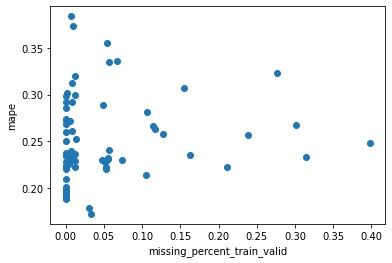

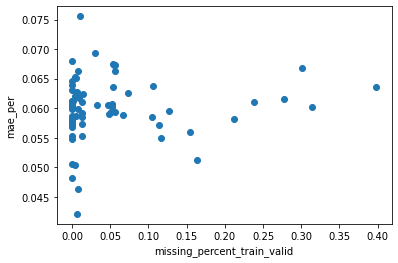

In [ ]:
fig = plt.figure()
plt.scatter(df_test["missing_percent_train_valid"],df_test["mape"])
plt.xlabel("missing_percent_train_valid")
plt.ylabel("mape")
plt.show()

fig = plt.figure()
plt.scatter(df_test["missing_percent_train_valid"],df_test["mae_per"])
plt.xlabel("missing_percent_train_valid")
plt.ylabel("mae_per")
plt.show()

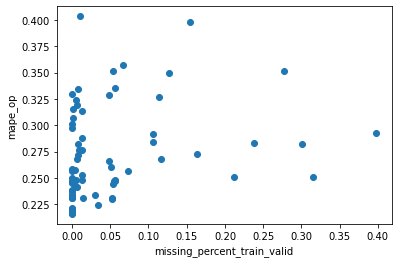

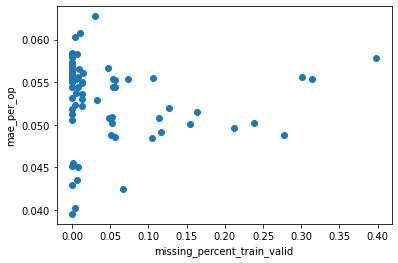

In [ ]:
fig = plt.figure()
plt.scatter(df_test["missing_percent_train_valid"],df_test["mape_op"])
plt.xlabel("missing_percent_train_valid")
plt.ylabel("mape_op")
plt.show()

fig = plt.figure()
plt.scatter(df_test["missing_percent_train_valid"],df_test["mae_per_op"])
plt.xlabel("missing_percent_train_valid")
plt.ylabel("mae_per_op")
plt.show()

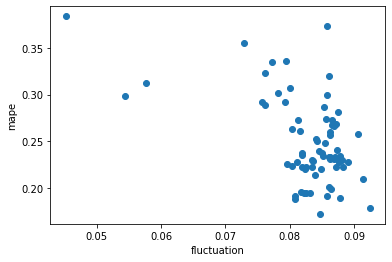

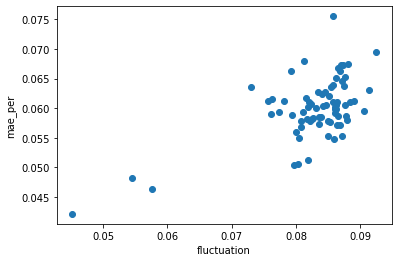

In [ ]:
fig = plt.figure()
plt.scatter(df_test["fluctuation"],df_test["mape"])
plt.xlabel("fluctuation")
plt.ylabel("mape")
plt.show()

fig = plt.figure()
plt.scatter(df_test["fluctuation"],df_test["mae_per"])
plt.xlabel("fluctuation")
plt.ylabel("mae_per")
plt.show()

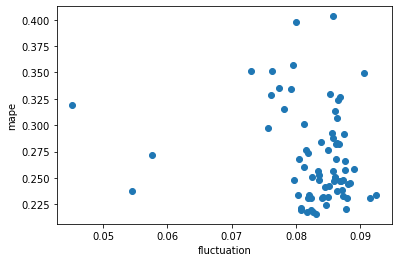

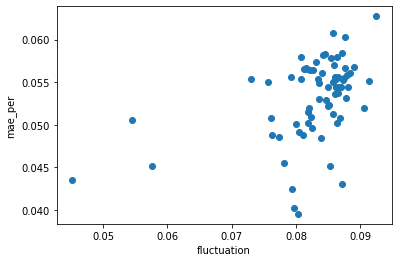

In [ ]:
fig = plt.figure()
plt.scatter(df_test["fluctuation"],df_test["mape_op"])
plt.xlabel("fluctuation")
plt.ylabel("mape")
plt.show()

fig = plt.figure()
plt.scatter(df_test["fluctuation"],df_test["mae_per_op"])
plt.xlabel("fluctuation")
plt.ylabel("mae_per")
plt.show()

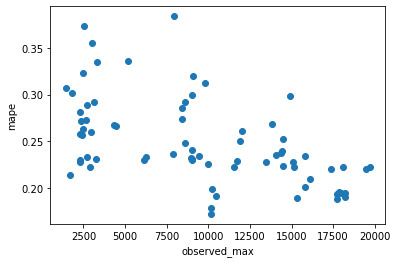

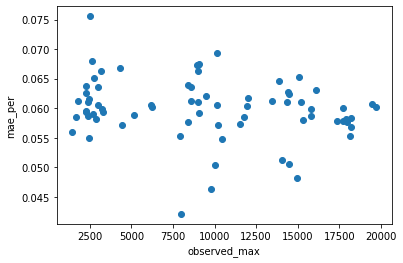

In [ ]:
fig = plt.figure()
plt.scatter(df_test["observed_max"],df_test["mape"])
plt.xlabel("observed_max")
plt.ylabel("mape")
plt.show()

fig = plt.figure()
plt.scatter(df_test["observed_max"],df_test["mae_per"])
plt.xlabel("observed_max")
plt.ylabel("mae_per")
plt.show()

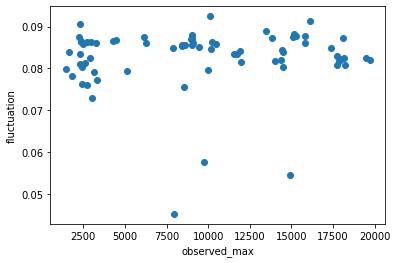

In [ ]:
fig = plt.figure()
plt.scatter(df_test["observed_max"],df_test["fluctuation"])
plt.xlabel("observed_max")
plt.ylabel("fluctuation")
plt.show()

In [ ]:
pd.DataFrame(df_test.corr().mape).sort_values(ascending=False,by="mape",key=abs)

,mape
mape,1.000000
nmae,0.826670
mape_op,0.804375
nrmse,0.558439
observed_max,-0.533194
fluctuation,-0.521940
nmae_op,0.469444
observed_max_test,-0.462282
rmse_op,-0.399960
r2,-0.336080


In [ ]:
pd.DataFrame(df_test.corr().mae_per).sort_values(ascending=False,by="mae_per",key=abs)

,mae_per
mae_per,1.000000
rmse,0.944886
rmse_op,0.679610
observed_max_test,0.637002
fluctuation,0.616970
mae_per_op,0.615271
nmae_op,0.293862
r2_op,0.250930
nrmse_op,0.238811
r2,-0.232818


In [ ]:
#df_test.to_csv("/content/drive/MyDrive/pv予測/output/multipoint_220326_/220831/df_test.csv",index=False)
#p = pd.read_csv("/content/drive/MyDrive/pv予測/output/multipoint_220326_/220831/df_test.csv")

In [ ]:
test.head()

,datetime,year,month,day,time,minute,id,id_lat,id_lng,id_lat_mesh,id_lng_mesh,id_prefecture,pvrate,observed_max,twoweeks_max,flo_lng,flo_lat,flo,nv,nv_meshint,env,preal,preal_meshint,ppred,nv_max_perror,nv_meshint_max_perror,preal-30,env_10000095,env_10000269,env_1020000002,env_1110000001,env_1110000010,env_1110000011,env_1110000012,env_1110000013,env_1110000014,env_1110000015,env_1160000025,env_1160000090,env_1160000091,env_1160000182,env_1160000185,env_1160000253,env_1160000387,env_1160000402,env_1160000419,env_1160000423,env_1270000026,env_1280000048,env_1550000001,env_1650000004,env_1680000001,env_1680000002,env_1680000003,env_1680000004,env_1680000010,env_1680000017,env_1680000021,env_1680000033,env_1680000047,env_1680000054,env_1680000057,env_1680000063,env_1680000067,env_1680000080,env_1680000097,env_1680000107,env_1680000108,env_1680000112,env_1680000151,env_1680000152,env_1680000213,env_1680000216,env_1680000217,env_1680000218,env_1680000223,env_1680000228,env_1680000285,env_1680000287,env_1680000327,env_1680000364,env_2220000001,env_2220000002,env_2220000003,env_2730000001,env_2910000002,env_3000000007,env_3000000012,env_3000000042,env_5000000044,env_5000000045,env_6000000016,env_6000000017,env_6060000016,env_6060000017,env_6060000018,env_6170000016,env_6170000123,env_6170000124,env_6170000125,env_6620000065,env_6620000066,env_6620000088,env_6620000089,env_6620000111,env_6620000117,env_6620000118,env_6620000121,env_6620000122,env_6620000123,env_6620000124,env_6620000131,env_6620000132,env_6910000180,env_6910000198,env_6910000200,env_6910000206,env_6910000216,env_6910000217,env_6910000239,env_6910000240,env_6910000249,env_6910000250,env_6910000421,env_6910000424,env_6910000425,preal-30_10000095,preal-30_10000269,preal-30_1020000002,preal-30_1110000001,preal-30_1110000010,preal-30_1110000011,preal-30_1110000012,preal-30_1110000013,preal-30_1110000014,preal-30_1110000015,preal-30_1160000025,preal-30_1160000090,preal-30_1160000091,preal-30_1160000182,preal-30_1160000185,preal-30_1160000253,preal-30_1160000387,preal-30_1160000402,preal-30_1160000419,preal-30_1160000423,preal-30_1270000026,preal-30_1280000048,preal-30_1550000001,preal-30_1650000004,preal-30_1680000001,preal-30_1680000002,preal-30_1680000003,preal-30_1680000004,preal-30_1680000010,preal-30_1680000017,preal-30_1680000021,preal-30_1680000033,preal-30_1680000047,preal-30_1680000054,preal-30_1680000057,preal-30_1680000063,preal-30_1680000067,preal-30_1680000080,preal-30_1680000097,preal-30_1680000107,preal-30_1680000108,preal-30_1680000112,preal-30_1680000151,preal-30_1680000152,preal-30_1680000213,preal-30_1680000216,preal-30_1680000217,preal-30_1680000218,preal-30_1680000223,preal-30_1680000228,preal-30_1680000285,preal-30_1680000287,preal-30_1680000327,preal-30_1680000364,preal-30_2220000001,preal-30_2220000002,preal-30_2220000003,preal-30_2730000001,preal-30_2910000002,preal-30_3000000007,preal-30_3000000012,preal-30_3000000042,preal-30_5000000044,preal-30_5000000045,preal-30_6000000016,preal-30_6000000017,preal-30_6060000016,preal-30_6060000017,preal-30_6060000018,preal-30_6170000016,preal-30_6170000123,preal-30_6170000124,preal-30_6170000125,preal-30_6620000065,preal-30_6620000066,preal-30_6620000088,preal-30_6620000089,preal-30_6620000111,preal-30_6620000117,preal-30_6620000118,preal-30_6620000121,preal-30_6620000122,preal-30_6620000123,preal-30_6620000124,preal-30_6620000131,preal-30_6620000132,preal-30_6910000180,preal-30_6910000198,preal-30_6910000200,preal-30_6910000206,preal-30_6910000216,preal-30_6910000217,preal-30_6910000239,preal-30_6910000240,preal-30_6910000249,preal-30_6910000250,preal-30_6910000421,preal-30_6910000424,preal-30_6910000425,nv2,pred,env2,observed,fluctuation
7106,2014-07-01 06:30:00,2014,7,1,6,30,10000095,35.74936,139.99181,35.74,140.0,千葉県,4.0,958.4,470.8,0.099219,0.000036,0.009880,0.155,0.351,100.7512,72.974,165.251,100.951,2.919,-6.709,NaN,100.7512,36.4014,794.4300,535.5680,2304.2130,2353.9002,2189.3268,2207.9286,2403.5874,24

In [ ]:
#df_test.to_csv("/content/drive/MyDrive/pv予測/output/multipoint_220326_/220907/df_test.csv",index=False) #オプあり

予測

In [ ]:
import lightgbm as lgb
import joblib

scores2 = pd.DataFrame(columns=["month","train.shape[0]","train_mape","valid_mape","test_mape","train_rmse","valid_rmse","test_rmse"])
month_list = [5,4,3,2,1,12,11,10,9,8]
train2,valid2 = for_train2[for_train2.month.isin(month_list)],for_train2[for_train2.month==6]
test2 = for_test2[for_test2.month==7]

features1 = ["year","month","day","time","minute","id","pvrate","id_lat","id_lng"] + [f"preal-30_{unique_id[i]}" for i in range(len(unique_id))]

params = {
    'boosting_type': 'gbdt',
    'metric': 'rmse',
    'objective': 'regression',
    #'device':'gpu'
}
lgb_results = []

train_set, val_set = lgb.Dataset(train2[features1],train2[target]), lgb.Dataset(valid2[features1],valid2[target])

# Train and evaluate
lgb_result = {} 
model = lgb.train(
    params, 
    train_set, 
    num_boost_round = 10000, 
    early_stopping_rounds = 100, 
    valid_sets = [train_set, val_set], 
    verbose_eval = 100,
    evals_result = lgb_result,
)
lgb_results.append(lgb_result)

#model_path = f'/content/drive/MyDrive/pv予測/output/multipoint_220326_/output/220719_lightbgm_flow2_month_list_{month_list}_lgb.pkl'
model_path = f"220719_lightbgm_flow2_month_list_{month_list}_lgb.pkl"
joblib.dump(model, model_path)
tt = joblib.load(model_path)

train2["pred"] = tt.predict(train2[features1])
valid2["pred"] = tt.predict(valid2[features1])
test2["pred"] = tt.predict(test2[features1])

scores2= scores2.append({"month":month_list,"train.shape[0]":train2.shape[0],
              "train_mape":(np.abs((train2.loc[train2.nv2!=0,"pred"] - train2.loc[train2.nv2!=0,"nv2"])/train2.loc[train2.nv2!=0,"nv2"])).mean(),
              "valid_mape":(np.abs((valid2.loc[valid2.nv2!=0,"pred"] - valid2.loc[valid2.nv2!=0,"nv2"])/valid2.loc[valid2.nv2!=0,"nv2"])).mean(),
              "test_mape":(np.abs((test2.loc[test2.nv2!=0,"pred"] - test2.loc[test2.nv2!=0,"nv2"])/test2.loc[test2.nv2!=0,"nv2"])).mean(),
              "train_rmse":np.sqrt(mean_squared_error(train2["nv2"], train2["pred"])),
              "valid_rmse":np.sqrt(mean_squared_error(valid2["nv2"], valid2["pred"])),
              "test_rmse":np.sqrt(mean_squared_error(test2["nv2"], test2["pred"]))}
            ,ignore_index=True)

Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 0.074145	valid_1's rmse: 0.106715
[200]	training's rmse: 0.0657785	valid_1's rmse: 0.104323
[300]	training's rmse: 0.0607701	valid_1's rmse: 0.103146
[400]	training's rmse: 0.0574703	valid_1's rmse: 0.10215
[500]	training's rmse: 0.0548356	valid_1's rmse: 0.101665
[600]	training's rmse: 0.0526673	valid_1's rmse: 0.100953
[700]	training's rmse: 0.050872	valid_1's rmse: 0.100709
[800]	training's rmse: 0.0492485	valid_1's rmse: 0.100329
[900]	training's rmse: 0.0479761	valid_1's rmse: 0.100227
[1000]	training's rmse: 0.0467931	valid_1's rmse: 0.100145
[1100]	training's rmse: 0.045719	valid_1's rmse: 0.0999981
[1200]	training's rmse: 0.0447243	valid_1's rmse: 0.0999514
[1300]	training's rmse: 0.0438418	valid_1's rmse: 0.0998337
[1400]	training's rmse: 0.0430377	valid_1's rmse: 0.0997516
[1500]	training's rmse: 0.0423482	valid_1's rmse: 0.0996356
[1600]	training's rmse: 0.0416755	valid_1's rmse: 0.0995646


In [ ]:
from sklearn.metrics import r2_score

test2["observed"] = test2["nv2"]*test2["observed_max"]
test2["fluctuation"] = np.abs((test2["observed"] - test2["preal-30"])/test2["observed_max"])
test2["env2"] = test2["env"] / test2["observed_max"]
test2_result = pd.DataFrame(columns=["id","rmse","mape","mae_per","rmse_op","mape_op","nrmse","nmae","r2","mae_per_op","nrmse_op","nmae_op","r2_op","fluctuation","observed_max"])
for id,group in test2.groupby("id"):
  mape = (np.abs((group.loc[group.nv2!=0,"pred"] - group.loc[group.nv2!=0,"nv2"])/group.loc[group.nv2!=0,"nv2"])).mean()
  rmse = np.sqrt(mean_squared_error(group["nv2"], group["pred"]))
  mae_per = np.abs(group["pred"] - group["nv2"]).mean()
  nrmse = np.sqrt(np.mean(((group.pred-group.nv2)/group.nv2.max())**(2))) ##論文　Spatio-Temporal Graph Neural Networks for Multi-Site PV Power Forecasting
  nmae = np.abs(group.pred-group.nv2).sum()/group.nv2.sum() ##論文　Spatio-Temporal Graph Neural Networks for Multi-Site PV Power Forecasting
  r2 = r2_score(group["nv2"], group["pred"])

  mape_op = (np.abs((group.loc[group.nv2!=0,"env2"] - group.loc[group.nv2!=0,"nv2"])/group.loc[group.nv2!=0,"nv2"])).mean()
  rmse_op = np.sqrt(mean_squared_error(group["nv2"], group["env2"]))
  mae_per_op = np.abs(group["pred"] - group["env2"]).mean()
  nrmse_op = np.sqrt(np.mean(((group.env2-group.nv2)/group.nv2.max())**(2)))
  nmae_op = np.abs(group.env2-group.nv2).sum()/group.nv2.sum()
  r2_op = r2_score(group["env2"], group["pred"])

  fluctuation = group["fluctuation"].mean()
  observed_max = group["observed_max"].iloc[0]

  test2_result = test2_result.append({"id":id,"rmse":rmse,"mape":mape,"mae_per":mae_per,"nrmse":nrmse,"nmae":nmae,"r2":r2,"rmse_op":rmse_op,"mape_op":mape_op,"mae_per_op":mae_per_op,"nrmse_op":nrmse_op,\
                                    "nmae_op":nmae_op,"r2_op":r2_op,"fluctuation":fluctuation,"observed_max":observed_max,"observed_max_test":group.nv2.max()},ignore_index=True)

df_test2 = pd.merge(df_missing,test2_result,on="id")
df_test2 = df_test2[df_test2.missing_percent_test==0]

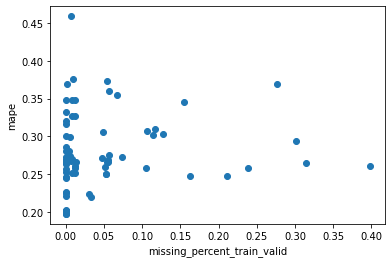

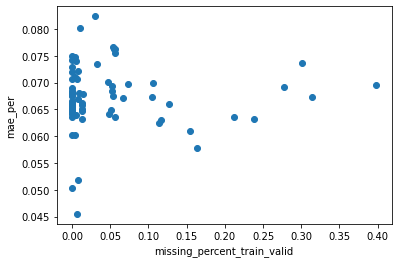

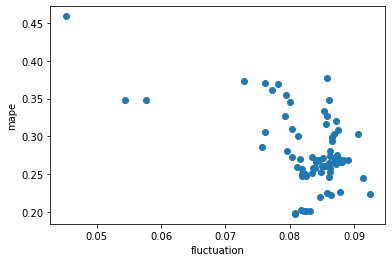

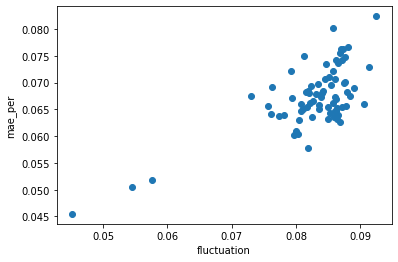

In [ ]:
fig = plt.figure()
plt.scatter(df_test2["missing_percent_train_valid"],df_test2["mape"])
plt.xlabel("missing_percent_train_valid")
plt.ylabel("mape")
plt.show()

fig = plt.figure()
plt.scatter(df_test2["missing_percent_train_valid"],df_test2["mae_per"])
plt.xlabel("missing_percent_train_valid")
plt.ylabel("mae_per")
plt.show()

fig = plt.figure()
plt.scatter(df_test2["fluctuation"],df_test2["mape"])
plt.xlabel("fluctuation")
plt.ylabel("mape")
plt.show()

fig = plt.figure()
plt.scatter(df_test2["fluctuation"],df_test2["mae_per"])
plt.xlabel("fluctuation")
plt.ylabel("mae_per")
plt.show()

In [ ]:
#df_test2.to_csv("/content/drive/MyDrive/pv予測/output/multipoint_220326_/220907/df_test2_2.csv",index=False) #オプあり
#df_test.to_csv("/content/drive/MyDrive/pv予測/output/multipoint_220326_/220907/df_test_2.csv",index=False) #オプあり

In [ ]:
df_test.isnull().sum().sum()

0